In [1]:
# Import necessary libraries

import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For static visualizations
import seaborn as sns  # For advanced statistical visualizations
import plotly.express as px  # For interactive plots (high-level)
import plotly.graph_objects as go  # For customizable interactive plots
from sklearn.preprocessing import StandardScaler  # For feature standardization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pandas.plotting import scatter_matrix
# Importing machine learning models and evaluation metrics
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
# For Hyperparameter Tuning
from scipy.stats import uniform, randint

In [2]:
data =pd.read_csv('/content/DataPreprocessing (1).csv')

In [3]:
data.head()

,gender,age,num_procedures,num_medications,number_emergency,number_inpatient,max_glu_serum,A1Cresult,insulin,change,...,time_diagnoses_interaction,diag_1_category,diag_2_category,diag_3_category,sulfonylureas,biguanides,thiazolidinediones,meglitinides,alpha_glucosidase_inhibitors,other_combination_therapies
0,0,0.0,0,0.0000,0,0,2,2,1,1,...,1,1,1,1,0,0,0,0,0,0
1,0,10.0,0,0.2125,0,0,2,2,3,0,...,27,1,1,1,0,0,0,0,0,0
2,0,20.0,5,0.1500,0,1,2,2,1,1,...,12,4,1,6,1,0,0,0,0,0
3,1,30.0,1,0.1875,0,0,2,2,3,0,...,14,5,1,3,0,0,0,0,0,0
4,1,40.0,0,0.0875,0,0,2,2,2,0,...,5,0,0,1,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gender                        101763 non-null  int64  
 1   age                           101763 non-null  float64
 2   num_procedures                101763 non-null  int64  
 3   num_medications               101763 non-null  float64
 4   number_emergency              101763 non-null  int64  
 5   number_inpatient              101763 non-null  int64  
 6   max_glu_serum                 101763 non-null  int64  
 7   A1Cresult                     101763 non-null  int64  
 8   insulin                       101763 non-null  int64  
 9   change                        101763 non-null  int64  
 10  binary_diabetesMed            101763 non-null  int64  
 11  readmitted                    101763 non-null  int64  
 12  time_diagnoses_interaction    101763 non-nul

In [ ]:
data.shape

(101763, 22)

# Split the data using the target readmitted

In [4]:
X = data.drop(columns=['readmitted'])  # Features
y = data['readmitted']  # Target

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split and check the shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (81410, 21), Test data shape: (20353, 21)


# Using Models with class_weight='balanced'

# 1. logistic_regression

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred1_balance = model.predict(X_test)

Logistic Regression Accuracy: 0.6802
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80     18084
           1       0.17      0.49      0.26      2269

    accuracy                           0.68     20353
   macro avg       0.54      0.60      0.53     20353
weighted avg       0.83      0.68      0.74     20353



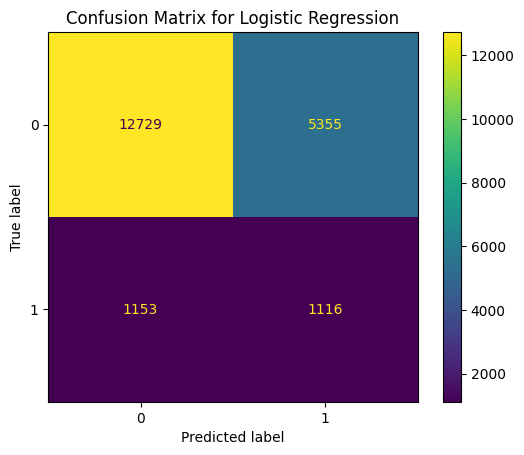

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred1_balance)
report_logistic = classification_report(y_test, y_pred1_balance, zero_division=1)

# طباعة النتائج
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression Classification Report:\n{report_logistic}")

# رسم مصفوفة الالتباس لنموذج Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred1_balance)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# 1.2 RandomForest

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred_rf=model.predict(X_test)

RandomForest Accuracy: 0.8871
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18084
           1       0.32      0.01      0.02      2269

    accuracy                           0.89     20353
   macro avg       0.60      0.50      0.48     20353
weighted avg       0.83      0.89      0.84     20353



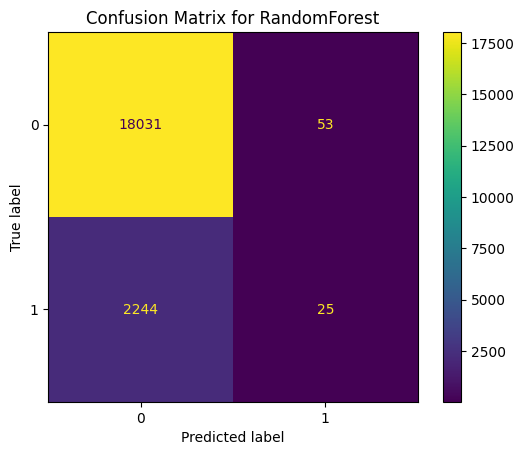

In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred_rf)
report_RF = classification_report(y_test, y_pred_rf, zero_division=1)

# طباعة النتائج
print(f"RandomForest Accuracy: {accuracy_RF:.4f}")
print(f"RandomForest Classification Report:\n{report_RF}")

# رسم مصفوفة الالتباس لنموذج Logistic Regression
cm_RF = confusion_matrix(y_test, y_pred_rf)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot()
plt.title("Confusion Matrix for RandomForest")
plt.show()

# 1.3 DecisionTree

Accuracy: 0.8060728148184543
Confusion Matrix:
[[16060  2024]
 [ 1923   346]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     18084
           1       0.15      0.15      0.15      2269

    accuracy                           0.81     20353
   macro avg       0.52      0.52      0.52     20353
weighted avg       0.81      0.81      0.81     20353



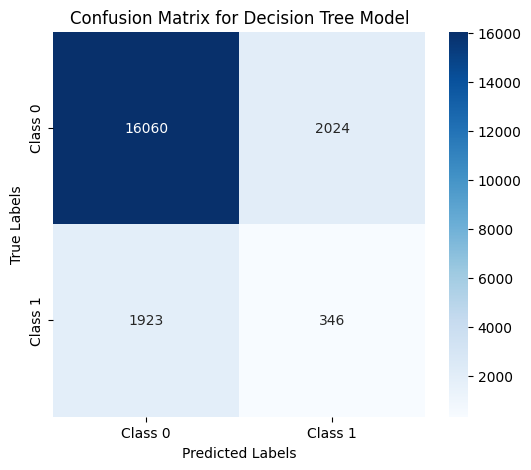

In [ ]:
# تهيئة نموذج شجرة القرار
model_dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

# تقييم النموذج
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt)}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_dt)

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 1.4 XGB


Training XGBoost...
XGBoost Accuracy: 0.8870
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18084
           1       0.35      0.02      0.03      2269

    accuracy                           0.89     20353
   macro avg       0.62      0.51      0.49     20353
weighted avg       0.83      0.89      0.84     20353



<Figure size 640x480 with 0 Axes>

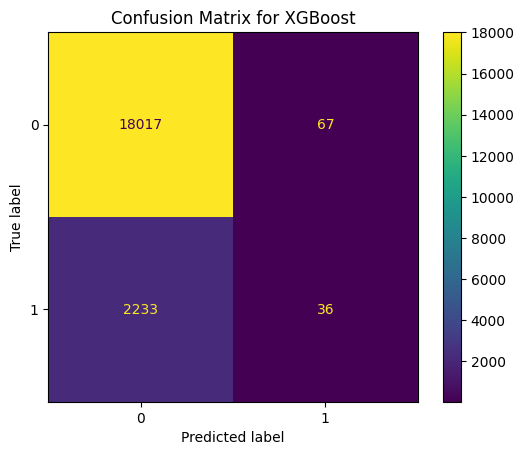

In [ ]:
# تعريف موديل XGBoost
model = XGBClassifier(random_state=42)

# تدريب الموديل
print("\nTraining XGBoost...")
model.fit(X_train, y_train)
y_pred_XG = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred_XG)
report = classification_report(y_test, y_pred_XG, zero_division=1)

# طباعة الدقة والتقرير
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_XG)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()

# 1.5 KNN


Training KNN...
KNN Accuracy: 0.8801
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18084
           1       0.23      0.03      0.06      2269

    accuracy                           0.88     20353
   macro avg       0.56      0.51      0.50     20353
weighted avg       0.82      0.88      0.84     20353



<Figure size 640x480 with 0 Axes>

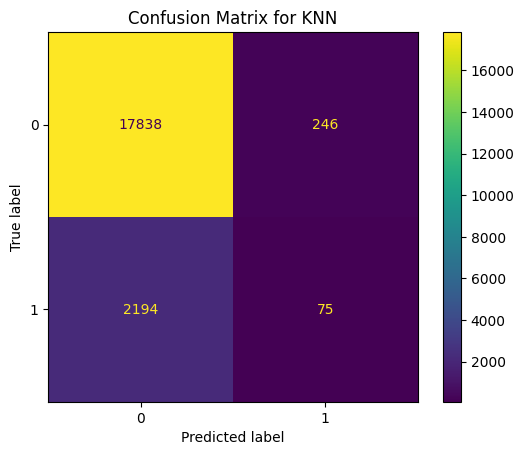

In [ ]:
# تعريف موديل KNN
model = KNeighborsClassifier()

# تدريب الموديل
print("\nTraining KNN...")
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

# حساب الدقة والتقرير
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, zero_division=1)

# طباعة الدقة والتقرير
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Classification Report:\n{report_knn}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

# 1.6 Gradient Boosting

Accuracy: 88.70%


<Figure size 640x480 with 0 Axes>

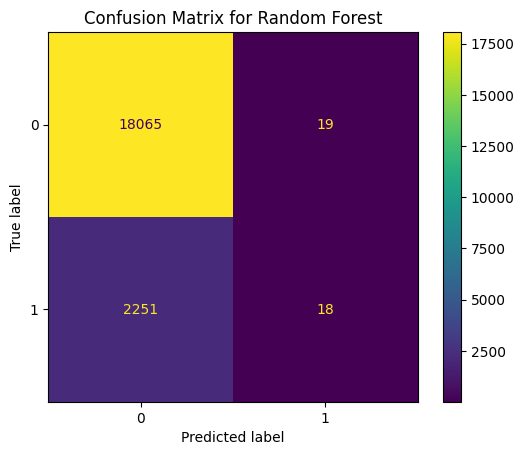

In [ ]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy * 100:.2f}%')
# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Naive Bayes


Training Naive Bayes...
Naive Bayes Accuracy: 0.8459
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     18084
           1       0.22      0.15      0.18      2269

    accuracy                           0.85     20353
   macro avg       0.56      0.54      0.55     20353
weighted avg       0.82      0.85      0.83     20353



<Figure size 640x480 with 0 Axes>

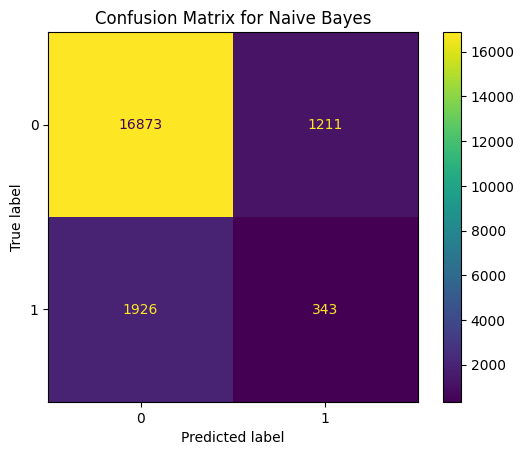

In [ ]:
# تعريف موديل Naive Bayes
model = GaussianNB()

# تدريب الموديل
print("\nTraining Naive Bayes...")
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred3)
report = classification_report(y_test, y_pred3, zero_division=1)

# طباعة الدقة والتقرير
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Naive Bayes Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


In [ ]:
models = ['Logistic Regression',
          'Random Forest', 'Decision Tree','XGBoost',
          'KNN','GradientBoosting','Naive Bayes']
accuracies = [accuracy_score(y_test, y_pred1_balance),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_XG),
              accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_gb),
              accuracy_score(y_test, y_pred3)
              ]

In [ ]:
for model, score in zip(models, accuracies):
    print(f"{model:<20} | Accuracy: {score:.4f}")

Logistic Regression  | Accuracy: 0.6802
Random Forest        | Accuracy: 0.8871
Decision Tree        | Accuracy: 0.8061
XGBoost              | Accuracy: 0.8870
KNN                  | Accuracy: 0.8801
GradientBoosting     | Accuracy: 0.8885
Naive Bayes          | Accuracy: 0.8459


# 2.1 Logistic After apply the SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# تطبيق SMOTE على مجموعة التدريب فقط
smote = SMOTE(sampling_strategy='auto', random_state=42)  # زيادة عينات الفئة الأقل تمثيلًا
X_train_res, y_train_res = smote.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

# Verify the split and check the shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (144649, 21), Test data shape: (36163, 21)


## Appling Logistic Regression after SMOTE

In [ ]:
logistic_regression_model = LogisticRegression(random_state = 42)
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.6913
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     17884
           1       0.70      0.68      0.69     18279

    accuracy                           0.69     36163
   macro avg       0.69      0.69      0.69     36163
weighted avg       0.69      0.69      0.69     36163



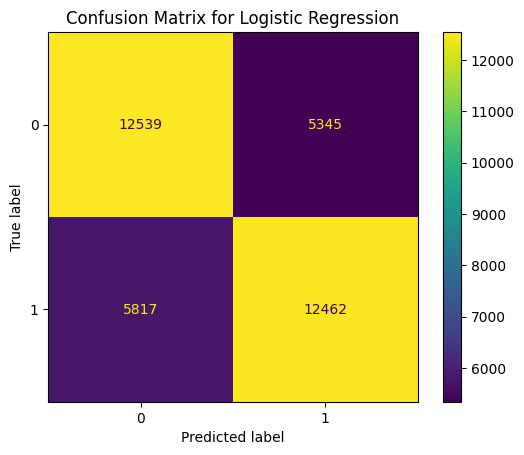

In [ ]:
y_pred1_SMOTE = logistic_regression_model.predict(X_test)

# حساب الدقة والتقرير
accuracy_logistic = accuracy_score(y_test, y_pred1_SMOTE)
report_logistic = classification_report(y_test, y_pred1_SMOTE, zero_division=1)

# طباعة النتائج
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression Classification Report:\n{report_logistic}")

# رسم مصفوفة الالتباس لنموذج Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred1_SMOTE)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# 2.2 RandomForestClassifier

RandomForest Accuracy: 0.8876
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     17884
           1       0.91      0.86      0.89     18279

    accuracy                           0.89     36163
   macro avg       0.89      0.89      0.89     36163
weighted avg       0.89      0.89      0.89     36163



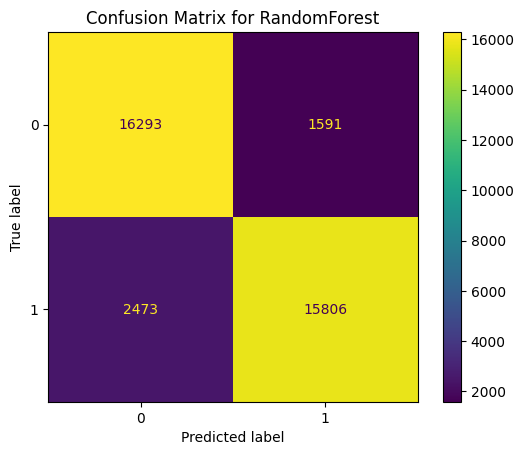

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred_rfS=model.predict(X_test)

accuracy_RF = accuracy_score(y_test, y_pred_rfS)
report_RF = classification_report(y_test, y_pred_rfS, zero_division=1)

# طباعة النتائج
print(f"RandomForest Accuracy: {accuracy_RF:.4f}")
print(f"RandomForest Classification Report:\n{report_RF}")


cm_RF = confusion_matrix(y_test, y_pred_rfS)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot()
plt.title("Confusion Matrix for RandomForest")
plt.show()

# 2.3 DecisionTree

Accuracy: 0.8458922102701656
Confusion Matrix:
[[14723  3161]
 [ 2412 15867]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     17884
           1       0.83      0.87      0.85     18279

    accuracy                           0.85     36163
   macro avg       0.85      0.85      0.85     36163
weighted avg       0.85      0.85      0.85     36163



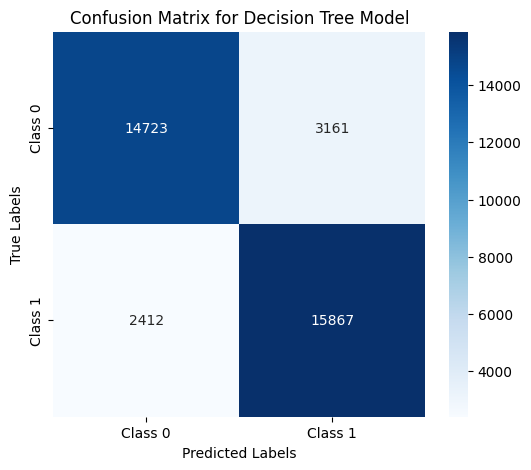

In [ ]:
# تهيئة نموذج شجرة القرار
model_dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt_s = model_dt.predict(X_test)

# تقييم النموذج
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_s)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt_s)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt_s)}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_dt_s)

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 2.4 XGB After SMOTE


Training XGBoost...
XGBoost Accuracy: 0.8803
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     17884
           1       0.96      0.79      0.87     18279

    accuracy                           0.88     36163
   macro avg       0.89      0.88      0.88     36163
weighted avg       0.89      0.88      0.88     36163



<Figure size 640x480 with 0 Axes>

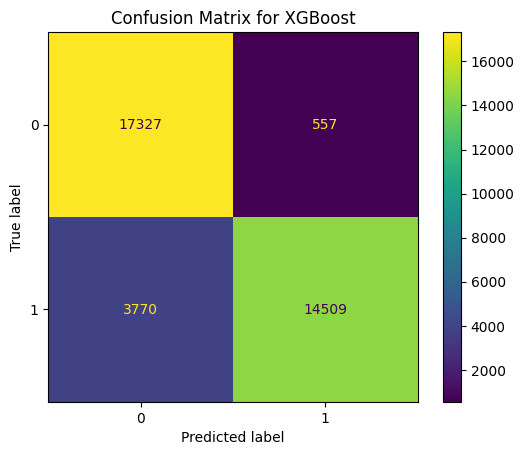

In [ ]:
# تعريف موديل XGBoost
model = XGBClassifier(random_state=42)

# تدريب الموديل
print("\nTraining XGBoost...")
model.fit(X_train, y_train)
y_pred_XG_S = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred_XG_S)
report = classification_report(y_test, y_pred_XG_S, zero_division=1)

# طباعة الدقة والتقرير
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_XG_S)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()

# 2.5 KNN After SMOTE


Training KNN...
KNN Accuracy: 0.8009
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76     17884
           1       0.73      0.96      0.83     18279

    accuracy                           0.80     36163
   macro avg       0.84      0.80      0.79     36163
weighted avg       0.84      0.80      0.80     36163



<Figure size 640x480 with 0 Axes>

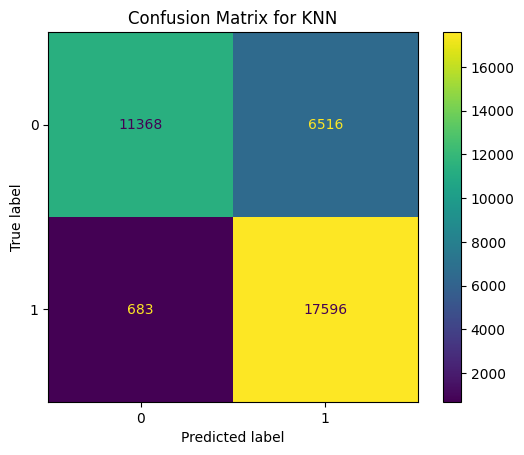

In [ ]:
# تعريف موديل KNN
model = KNeighborsClassifier()

# تدريب الموديل
print("\nTraining KNN...")
model.fit(X_train, y_train)
y_pred_smote = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred_smote)
report = classification_report(y_test, y_pred_smote, zero_division=1)

# طباعة الدقة والتقرير
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

# 2.6 GradientB after SMOTE

Accuracy: 78.08%


<Figure size 640x480 with 0 Axes>

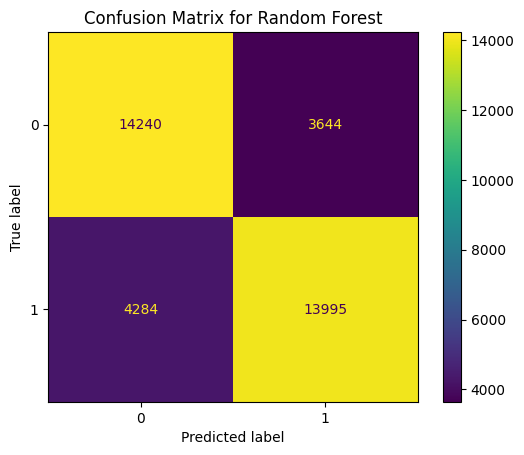

In [ ]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gb_s = gb_model.predict(X_test)
# Calculate accuracy
accuracy_gb_s = accuracy_score(y_test, y_pred_gb_s)
print(f'Accuracy: {accuracy_gb_s * 100:.2f}%')
# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_gb_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
models = ['Logistic Regression',
          'Random Forest', 'Decision Tree','XGBoost',
          'KNN','GradientBoosting']
accuracies = [accuracy_score(y_test, y_pred1_SMOTE),
              accuracy_score(y_test, y_pred_rfS),
              accuracy_score(y_test, y_pred_dt_s),
              accuracy_score(y_test, y_pred_XG_S),
              accuracy_score(y_test, y_pred_smote),
              accuracy_score(y_test, y_pred_gb_s)
             ]

In [ ]:
for model, score in zip(models, accuracies):
    print(f"{model:<20} | Accuracy: {score:.4f}")

Logistic Regression  | Accuracy: 0.6913
Random Forest        | Accuracy: 0.8876
Decision Tree        | Accuracy: 0.8459
XGBoost              | Accuracy: 0.8803
KNN                  | Accuracy: 0.8009
GradientBoosting     | Accuracy: 0.7808


In [ ]:
# Create DataFrame for Visualization
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Print models and their accuracy
print("Models Performance:\n")
for model, score in zip(models, accuracies):
    print(f"{model} => Accuracy: {score:.4f}")

# Select the Best Model Automatically
best_index = accuracies.index(max(accuracies))
best_model = models[best_index]
best_accuracy = accuracies[best_index]

print("\nThe Best Model is:", best_model)
print("With Accuracy:", best_accuracy)

# Print table
print("\nModels Accuracy Table:")
print(results)



Models Performance:

Logistic Regression => Accuracy: 0.6913
Random Forest => Accuracy: 0.8876
Decision Tree => Accuracy: 0.8459
XGBoost => Accuracy: 0.8803
KNN => Accuracy: 0.8009
GradientBoosting => Accuracy: 0.7808

The Best Model is: Random Forest
With Accuracy: 0.8876199430356995

Models Accuracy Table:
                 Model  Accuracy
0        Random Forest  0.887620
1              XGBoost  0.880347
2        Decision Tree  0.845892
3                  KNN  0.800929
4     GradientBoosting  0.780770
5  Logistic Regression  0.691342


In [ ]:
# Plot with Plotly
fig = px.bar(
    results,
    x='Accuracy',
    y='Model',
    orientation='h',
    title='Comparison of Models Accuracy',
    text='Accuracy',
    color='Accuracy',
    color_continuous_scale='Reds',
    height=500
)

# Add a line for best accuracy
fig.add_vline(x=best_accuracy, line_dash="dash", line_color="green", annotation_text=f"Best Accuracy: {best_accuracy:.4f}", annotation_position="top right")

# Improve layout
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Accuracy Score",
    yaxis_title="Models",
    showlegend=False
)

fig.show()

# Feature importance

In [5]:
# Drop the target column from df to get features
X = data.drop(columns=['readmitted'])

# Extract the target column
y = data['readmitted']

# Store feature names
feature_names = X.columns.tolist()

In [8]:
# Train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

DecisionTreeClassifier(random_state=42)

<ipython-input-9-4ab0dc7cd2fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


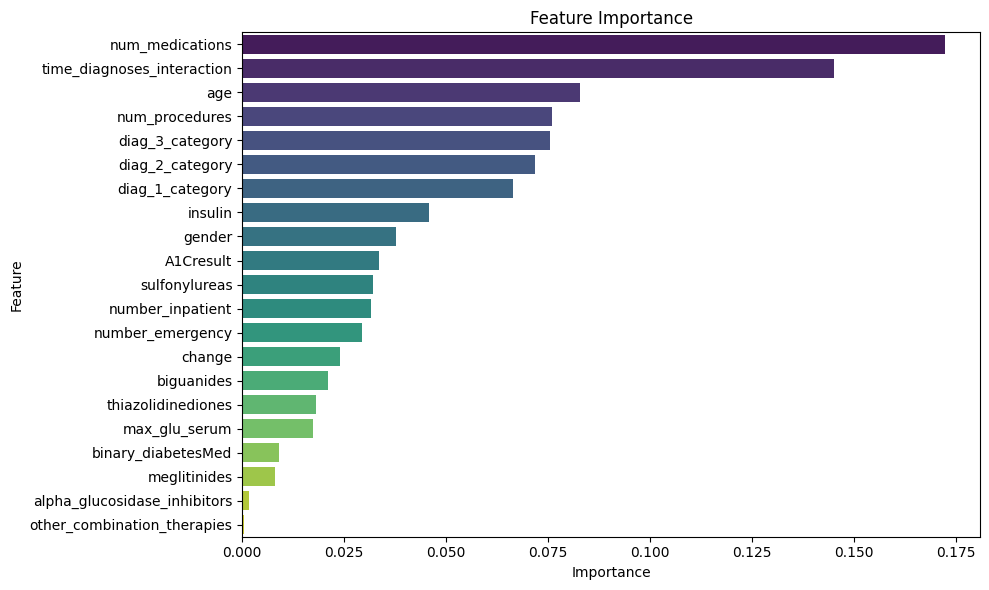

In [9]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gender                        101763 non-null  int64  
 1   age                           101763 non-null  float64
 2   num_procedures                101763 non-null  int64  
 3   num_medications               101763 non-null  float64
 4   number_emergency              101763 non-null  int64  
 5   number_inpatient              101763 non-null  int64  
 6   max_glu_serum                 101763 non-null  int64  
 7   A1Cresult                     101763 non-null  int64  
 8   insulin                       101763 non-null  int64  
 9   change                        101763 non-null  int64  
 10  binary_diabetesMed            101763 non-null  int64  
 11  readmitted                    101763 non-null  int64  
 12  time_diagnoses_interaction    101763 non-nul

In [11]:
data_new= data.drop(columns=['other_combination_therapies', 'alpha_glucosidase_inhibitors','meglitinides'
                            , 'thiazolidinediones','max_glu_serum','binary_diabetesMed'])

In [12]:
X = data_new.drop(columns=['readmitted'])  # Features
y = data_new['readmitted']  # Target

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split and check the shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (81410, 15), Test data shape: (20353, 15)


In [13]:
print(y_train.value_counts(normalize=True))# Print percentages

readmitted
0    0.888368
1    0.111632
Name: proportion, dtype: float64


In [14]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)


In [ ]:
print(y_resampled.value_counts(normalize=True))# Print percentages

readmitted
0    0.5
1    0.5
Name: proportion, dtype: float64


# Using SMOTE+Undersampling (SmoteTOmek)

In [15]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

In [16]:
# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verify the split and check the shape
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (143393, 15), Test data shape: (35849, 15)


# 3.1 Logistic using smotetomek

Logistic Regression Accuracy: 0.6885
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     17866
           1       0.69      0.69      0.69     17983

    accuracy                           0.69     35849
   macro avg       0.69      0.69      0.69     35849
weighted avg       0.69      0.69      0.69     35849



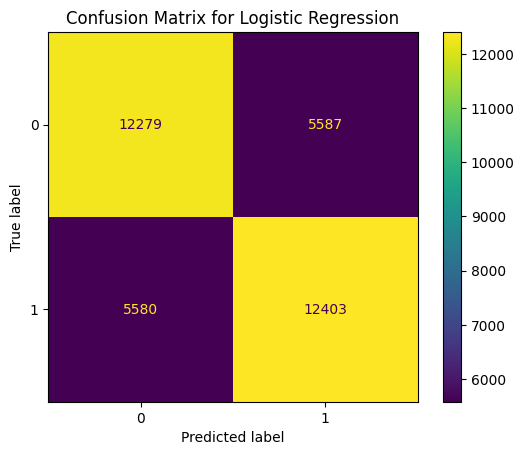

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred1_balance = model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred1_balance)
report_logistic = classification_report(y_test, y_pred1_balance, zero_division=1)

# طباعة النتائج
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression Classification Report:\n{report_logistic}")

# رسم مصفوفة الالتباس لنموذج Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred1_balance)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# 3.2 Randamforest

In [ ]:
model_RF = RandomForestClassifier(class_weight='balanced', random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

RandomForest Accuracy: 0.8696
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17866
           1       0.87      0.87      0.87     17983

    accuracy                           0.87     35849
   macro avg       0.87      0.87      0.87     35849
weighted avg       0.87      0.87      0.87     35849



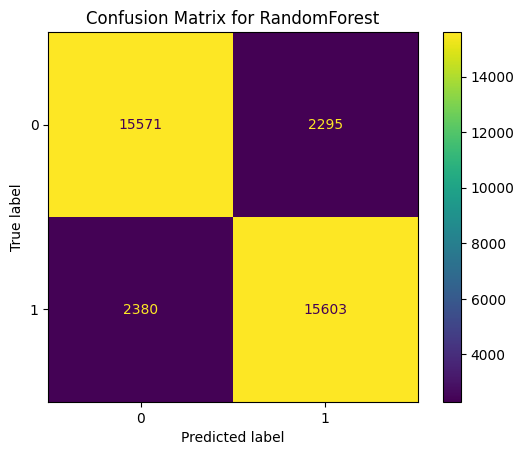

In [ ]:
y_pred_rf_ST=model_RF.predict(X_test)

accuracy_RF_st = accuracy_score(y_test, y_pred_rf_ST)
report_RF_st = classification_report(y_test, y_pred_rf_ST, zero_division=1)

# طباعة النتائج
print(f"RandomForest Accuracy: {accuracy_RF_st:.4f}")
print(f"RandomForest Classification Report:\n{report_RF_st}")


cm_RF = confusion_matrix(y_test, y_pred_rf_ST)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot()
plt.title("Confusion Matrix for RandomForest")
plt.show()

# 3.3 DecisionTree

Accuracy: 0.8350860553990348
Confusion Matrix:
[[14528  3338]
 [ 2574 15409]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     17866
           1       0.82      0.86      0.84     17983

    accuracy                           0.84     35849
   macro avg       0.84      0.84      0.83     35849
weighted avg       0.84      0.84      0.83     35849



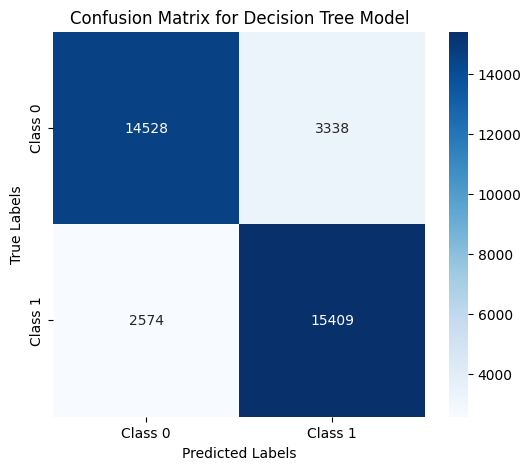

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# تهيئة نموذج شجرة القرار
model_dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)
model_dt.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_dt = model_dt.predict(X_test)

# تقييم النموذج

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt)}")

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_dt)

# رسم مصفوفة الالتباس
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# 3.4 XGB


Training XGBoost...
XGBoost Accuracy: 0.8684
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17866
           1       0.94      0.79      0.86     17983

    accuracy                           0.87     35849
   macro avg       0.88      0.87      0.87     35849
weighted avg       0.88      0.87      0.87     35849



<Figure size 640x480 with 0 Axes>

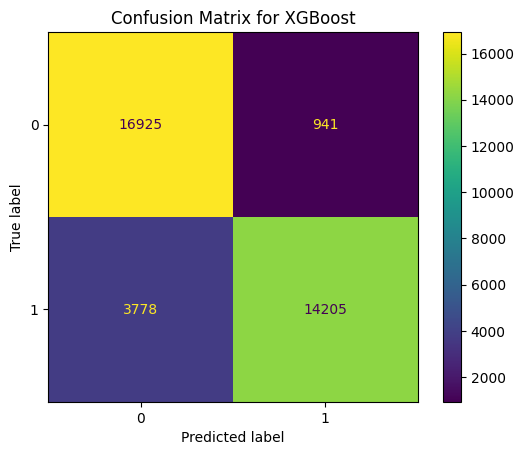

In [ ]:
# تعريف موديل XGBoost
model = XGBClassifier(random_state=42)

# تدريب الموديل
print("\nTraining XGBoost...")
model.fit(X_train, y_train)
y_pred_XG_ST = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred_XG_ST)
report = classification_report(y_test, y_pred_XG_ST, zero_division=1)

# طباعة الدقة والتقرير
print(f"XGBoost Accuracy: {accuracy:.4f}")
print(f"XGBoost Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_XG_ST)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for XGBoost")
plt.show()

# 3.5 KNN


Training KNN...
KNN Accuracy: 0.8041
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.77     17866
           1       0.73      0.96      0.83     17983

    accuracy                           0.80     35849
   macro avg       0.84      0.80      0.80     35849
weighted avg       0.84      0.80      0.80     35849



<Figure size 640x480 with 0 Axes>

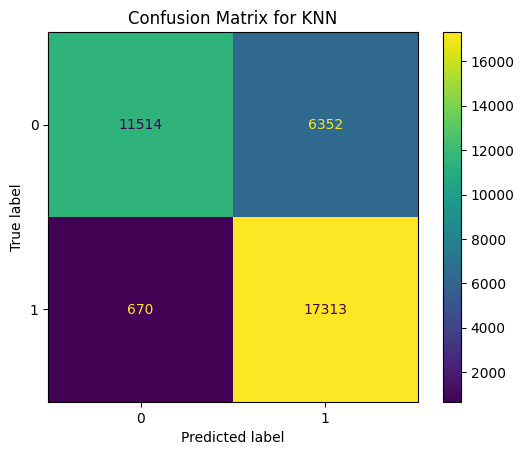

In [ ]:
# تعريف موديل KNN
model = KNeighborsClassifier()

# تدريب الموديل
print("\nTraining KNN...")
model.fit(X_train, y_train)
y_pred_knn_st = model.predict(X_test)

# حساب الدقة والتقرير
accuracy = accuracy_score(y_test, y_pred_knn_st)
report = classification_report(y_test, y_pred_knn_st, zero_division=1)

# طباعة الدقة والتقرير
print(f"KNN Accuracy: {accuracy:.4f}")
print(f"KNN Classification Report:\n{report}")

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_knn_st)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for KNN")
plt.show()

# 3.6 GradientBoosting

Accuracy: 77.50%


<Figure size 640x480 with 0 Axes>

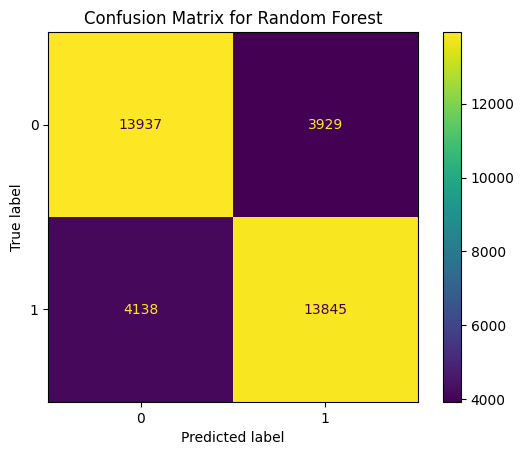

In [ ]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gb_st = gb_model.predict(X_test)
# Calculate accuracy
accuracy_gb_st = accuracy_score(y_test, y_pred_gb_st)
print(f'Accuracy: {accuracy_gb_st * 100:.2f}%')
# رسم مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_gb_st)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# فتح نافذة جديدة للرسم البياني
plt.figure()
disp.plot()
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
models = ['Logistic Regression',
          'Random Forest', 'Decision Tree','XGBoost',
          'KNN','GradientBoosting']
accuracies = [accuracy_score(y_test, y_pred1_balance),
              accuracy_score(y_test, y_pred_rf_ST),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_XG_ST),
              accuracy_score(y_test, y_pred_knn_st),
              accuracy_score(y_test, y_pred_gb_st)
             ]

In [ ]:
for model, score in zip(models, accuracies):
    print(f"{model:<20} | Accuracy: {score:.4f}")

Logistic Regression  | Accuracy: 0.6885
Random Forest        | Accuracy: 0.8696
Decision Tree        | Accuracy: 0.8351
XGBoost              | Accuracy: 0.8684
KNN                  | Accuracy: 0.8041
GradientBoosting     | Accuracy: 0.7750


In [ ]:
# Create DataFrame for Visualization
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
results = results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Print models and their accuracy
print("Models Performance:\n")
for model, score in zip(models, accuracies):
    print(f"{model} => Accuracy: {score:.4f}")

# Select the Best Model Automatically
best_index = accuracies.index(max(accuracies))
best_model = models[best_index]
best_accuracy = accuracies[best_index]

print("\nThe Best Model is:", best_model)
print("With Accuracy:", best_accuracy)

# Print table
print("\nModels Accuracy Table:")
print(results)



Models Performance:

Logistic Regression => Accuracy: 0.6885
Random Forest => Accuracy: 0.8696
Decision Tree => Accuracy: 0.8351
XGBoost => Accuracy: 0.8684
KNN => Accuracy: 0.8041
GradientBoosting => Accuracy: 0.7750

The Best Model is: Random Forest
With Accuracy: 0.8695918993556305

Models Accuracy Table:
                 Model  Accuracy
0        Random Forest  0.869592
1              XGBoost  0.868365
2        Decision Tree  0.835086
3                  KNN  0.804123
4     GradientBoosting  0.774973
5  Logistic Regression  0.688499


In [ ]:
# Plot with Plotly
fig = px.bar(
    results,
    x='Accuracy',
    y='Model',
    orientation='h',
    title='Comparison of Models Accuracy',
    text='Accuracy',
    color='Accuracy',
    color_continuous_scale='Reds',
    height=500
)

# Add a line for best accuracy
fig.add_vline(x=best_accuracy, line_dash="dash", line_color="green", annotation_text=f"Best Accuracy: {best_accuracy:.4f}", annotation_position="top right")

# Improve layout
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(
    xaxis_title="Accuracy Score",
    yaxis_title="Models",
    showlegend=False
)

fig.show()

# Hyperparameter Tuning

In [17]:
# Define the model
model = LogisticRegression(solver='liblinear')

# Define the hyperparameter space
param_dist = {
    'C': uniform(0.01, 10),  # Randomly select C between 0.01 and 10
    'penalty': ['l1', 'l2'],  # L1 or L2 penalty
    'max_iter': [100, 200, 300, 400],  # Number of iterations
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_:.4f}")

Best Parameters: {'C': np.float64(0.2641912674409519), 'max_iter': 100, 'penalty': 'l1'}
Best Score: 0.6882


In [24]:

# تعريف نموذج Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# تعريف توزيع المعلمات للبحث العشوائي
param_dist = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'subsample': [0.9, 1.0]
}


# تنفيذ RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,  # تقليل عدد التجارب
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='accuracy'
)

# تدريب النموذج
random_search.fit(X_train, y_train)

# عرض أفضل المعلمات
print("Best Parameters:", random_search.best_params_)

# التنبؤ باستخدام أفضل موديل
y_pred = random_search.best_estimator_.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 4, 'learning_rate': 0.1}
Accuracy: 85.59%


In [21]:

# تعريف النموذج
model = XGBClassifier(random_state=42)

# تعريف توزيع المعلمات للبحث العشوائي
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# تنفيذ RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,                # عدد التجارب العشوائية
    cv=3,                     # عدد الـ folds في التحقق المتقاطع
    scoring='accuracy',
    n_jobs=-1,                # لتفعيل المعالجة المتوازية
    random_state=42,
    verbose=1                 # يعرض تقدم العملية
)

# تدريب النموذج
random_search.fit(X_train, y_train)

# الحصول على أفضل المعلمات والنتيجة
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best Score: 0.8794


In [19]:
# تعريف نموذج KNN
knn_model = KNeighborsClassifier()

# شبكة المعلمات المراد تجربتها
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# تنفيذ GridSearchCV مع 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# تدريب النموذج
grid_search.fit(X_train, y_train)

# أفضل نموذج بعد ضبط المعلمات
best_knn = grid_search.best_estimator_

# التنبؤ على بيانات الاختبار
y_pred = best_knn.predict(X_test)

# تقييم النموذج
accuracy = accuracy_score(y_test, y_pred)

# طباعة النتائج
print("🔍 Best Parameters:", grid_search.best_params_)
print(f"✅ Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print(f"🎯 Test Accuracy: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
✅ Best Cross-Validation Score: 0.8133
🎯 Test Accuracy: 82.81%


In [ ]:
import joblib

# حفظ نموذج Random Forest
joblib.dump(model_RF, 'Best_RandomForest_Model.pkl')
print("Random Forest model saved successfully as 'Best_RandomForest_Model.pkl'")

# حفظ نموذج Decision Tree
joblib.dump(model_dt, 'Best_DecisionTree_Model.pkl')
print("Decision Tree model saved successfully as 'Best_DecisionTree_Model.pkl'")

Random Forest model saved successfully as 'Best_RandomForest_Model.pkl'
Decision Tree model saved successfully as 'Best_DecisionTree_Model.pkl'


#  Using NN with smotetomek

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# بناء نموذج شبكة الأعصاب
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # طبقة إخراج لتصنيف ثنائي

# تجميع النموذج
model.compile(loss='binary_crossentropy',  # ← لتصنيف ثنائي
              optimizer='adam',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=10,
          validation_split=0.2, callbacks=[early_stop])


# تقييم النموذج
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11472/11472 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7055 - loss: 0.5690 - val_accuracy: 0.7261 - val_loss: 0.5408
Epoch 2/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7289 - loss: 0.5406 - val_accuracy: 0.7270 - val_loss: 0.5388
Epoch 3/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7351 - loss: 0.5318 - val_accuracy: 0.7342 - val_loss: 0.5318
Epoch 4/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7370 - loss: 0.5300 - val_accuracy: 0.7360 - val_loss: 0.5292
Epoch 5/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7397 - loss: 0.5269 - val_accuracy: 0.7377 - val_loss: 0.5295
Epoch 6/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7416 - loss: 0.5229 - val_accuracy: 0.7341 - val_loss: 0.5298
Epoch 7/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7442 - loss: 0.5195 - val_accuracy: 0.7343 - val_loss: 0.5279
Epoch 8/50
11472/11472 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7415 - lo

# NN without Smotetomek

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# بناء نموذج شبكة الأعصاب
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # طبقة إخراج لتصنيف ثنائي

# تجميع النموذج
model.compile(loss='binary_crossentropy',  # ← لتصنيف ثنائي
              optimizer='adam',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=10,
          validation_split=0.2, callbacks=[early_stop])


# تقييم النموذج
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6513/6513 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8822 - loss: 0.3558 - val_accuracy: 0.8916 - val_loss: 0.3330
Epoch 2/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8902 - loss: 0.3346 - val_accuracy: 0.8915 - val_loss: 0.3343
Epoch 3/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8893 - loss: 0.3347 - val_accuracy: 0.8918 - val_loss: 0.3322
Epoch 4/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8880 - loss: 0.3367 - val_accuracy: 0.8915 - val_loss: 0.3323
Epoch 5/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8873 - loss: 0.3381 - val_accuracy: 0.8918 - val_loss: 0.3319
Epoch 6/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8870 - loss: 0.3380 - val_accuracy: 0.8918 - val_loss: 0.3330
Epoch 7/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8888 - loss: 0.3346 - val_accuracy: 0.8909 - val_loss: 0.3356
Epoch 8/50
6513/6513 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8880 - loss: 0.3329 - val

# K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.50


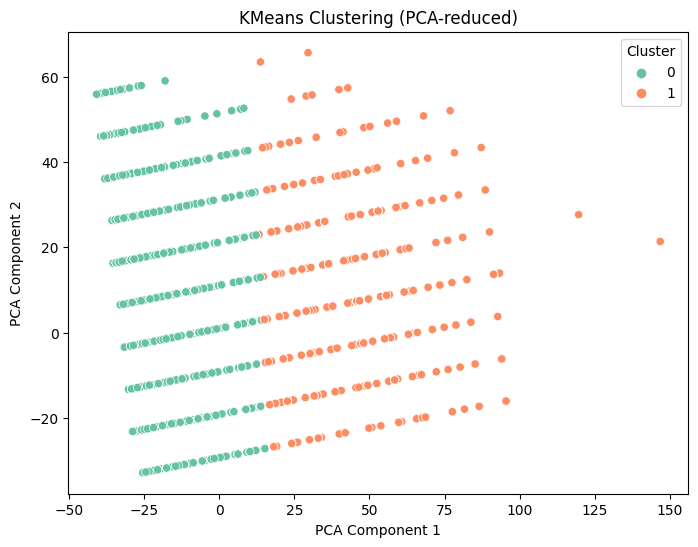

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# عدد العناقيد، بافتراض عندنا حالتين في y (مثلا: readmitted = 0 or 1)
k = 2

# تدريب KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# توقع العناقيد لمجموعة الاختبار
clusters = kmeans.predict(X_test)

# تقييم التجميع
score = silhouette_score(X_test, clusters)
print(f"Silhouette Score: {score:.2f}")

# تقليل الأبعاد لعرض بصري
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# رسم التجمعات المكتشفة
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# نفترض أن cluster 0 = class 0 و cluster 1 = class 1
acc_1 = accuracy_score(y_test, clusters)

# نجرب نعكسهم (cluster 0 = class 1 والعكس)
acc_2 = accuracy_score(y_test, 1 - clusters)

# نأخذ الدقة الأفضل من الاثنين
best_acc = max(acc_1, acc_2)

print(f"Estimated Accuracy of KMeans (after matching clusters to labels): {best_acc:.2f}")


Estimated Accuracy of KMeans (after matching clusters to labels): 0.72
